# Bellabeat Data Analysis Case Study

# Introduction

This analysis is a case study for completing the Data Analysis course on the Coursera platform. I played the role of Junior Data Analyst for Bellabeat, which consists of being a high-tech manufacturer of health-focused products for women. The products they offer consist of the analysing  trends present in smart devices that are responsible for modulating our daily self-knowledge. By making it possible to anticipate behavioral patterns that are harmful to health if, repeated constantly, could lead to physical and mental illness. Constant monitoring allows everyone to intervene objectively and directly in our routine. Producing greater control over our interaction with the stressors around us.
These patterns can be applied to the public by offering self-knowledge, reorganization, practical choices and routine reminders. Daily convenience by mapping and identifying daily stressors.
These patterns can guide and target the company's marketing campaigns. By exemplifying indicators of atypical behavior that could generate long-term muscle discomfort, thus mapping harmful defense strategies and mechanisms.

# Stakeholders

**Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
**Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
**Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. 

# These analytical thinking guided my analysis

What are some trends in smart device usage?
How could these trends apply to Bellabeat customers?
How could these trends help influence Bellabeat marketing strategy?**

 
# The business task is to bring Bella Beat's developers, marketing team and COO closer to their audience**

The task for businesses involves getting closer to their customers' daily routines to enable them to improve their well-being and quality of life with the help of the insights gathered.    

# A description of data sources used**

The data collected is second-party data made available on Kaggle by the user Mobius. This dataset was generated by respondents to a survey distributed via Amazon Mechanical Turk between 03.12.2016 and 05.12.2016.  The data analysed consists of daily activities of Thirty eligible Fitbit users consented to the submission of personal data from the tracker, the data analysed includes monitoring of daily activities that demand conscious attention and also includes monitoring of unconscious activities, such as the sleep-wake period.


# Set up our environment

Loading Packages

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#library (readr)
#library(dplyr)
#library(tidyverse)
#library(janitor)
#library(ggpubr)
#library(here)
#library(skimr)
#library(janitor)
#library(lubridate)
#library(ggrepel)
#library(getwd)
#library(patchwork)
#library(skimr)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "fitbit"

# Importing Dataset

In the following analysis, I will import daily activity, daily sleep data, information on users' weight and hourly calorie expenditure.

In [2]:
dailyActivity_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepDay_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourlyCalories_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")


> # Prepare and Process Phase
 **Now I'll look at the information aggregated in the  Daily Activities and the ramification of their sectors. **

In [3]:
str(dailyActivity_merged)
head(dailyActivity_merged)
summary(dailyActivity_merged)


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

In [4]:
colnames(dailyActivity_merged)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

    The daily activity data shows that we obtained 940 steps distributed over 15 variables, with a variability of movement between the total number of steps counted, the distance travelled during the daytime, the intensity of the activity carried out and the idle periods. Daytime activities are measured from the sedentary period of rest to the period of intense exercise. Distances travelled can be measured and turned into personal goals by users. 

**    Now I'll look at the documented data on users' sleep records**

In [5]:
str(sleepDay_merged)
head(sleepDay_merged)
summary(sleepDay_merged)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

In [6]:
colnames(sleepDay_merged)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

    On the sleep data, we obtained 413 observations within 5 variables. Examples include the day of slept, the amount of time spent in bed until falling asleep, the amount of sleep and the total number of minutes asleep. 

In [7]:

n_distinct(dailyActivity_merged$Id)
n_distinct(sleepDay_merged$Id)
n_distinct(weightLogInfo_merged$Id)


[1] 33

[1] 24

[1] 8

**    We noticed a discrepancy in the number of observations related to the weight of the participants. Because of this bias in the sample and the impossibility of carrying out a new data collection from this population, we will not use the volunteers' weight data. **

In [8]:
nrow(dailyActivity_merged)
nrow(sleepDay_merged)
nrow(hourlyCalories_merged)


[1] 940

[1] 413

[1] 22099

**    I will work with 940 line data reporting daytime activity. 
    410 daily sleep reports.
    And 22099 reporting the calories burned each hour.** 

    I will check for duplicate data in the information above 

In [9]:
sum(duplicated(dailyActivity_merged)) 
sum(duplicated(sleepDay_merged))
sum(duplicated(hourlyCalories_merged))


[1] 0

[1] 3

[1] 0

    Within the values required for our analysis, we processed the data presented to clean the data and  guarantee its integrity. Three duplicate values were found in the sleep record.

    Now we'll check whether the user records have been counted with any null values between them. And check that all the fields are filled with data.

In [10]:
sum(is.na(dailyActivity_merged))
sum(is.na(sleepDay_merged))
sum(is.na(hourlyCalories_merged))

[1] 0

[1] 0

[1] 0

   We removed duplicate values from the data collected on sleep periods. 

In [11]:

sleepDay_merged <- sleepDay_merged %>%
  distinct() 
  

> #  Analyse and Share
** Now I'll check the registration data and briefly summarise it statistically. **

In [12]:
sleepDay_merged %>%
    select(TotalSleepRecords,
           TotalMinutesAsleep,
           TotalTimeInBed) %>%
 summary() 

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

The minimum time required for women using Bellabeat to fall asleep is approximately 4 minutes. On average, it takes around 39 minutes for this population to initiate an effective sleep cycle. The records indicate that the most extended sleepless periods for clients accounted for a duration of 165 minutes. To put this into perspective, this period is equivalent to around 2 hours and 45 minutes, roughly the duration of a feature-length film.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


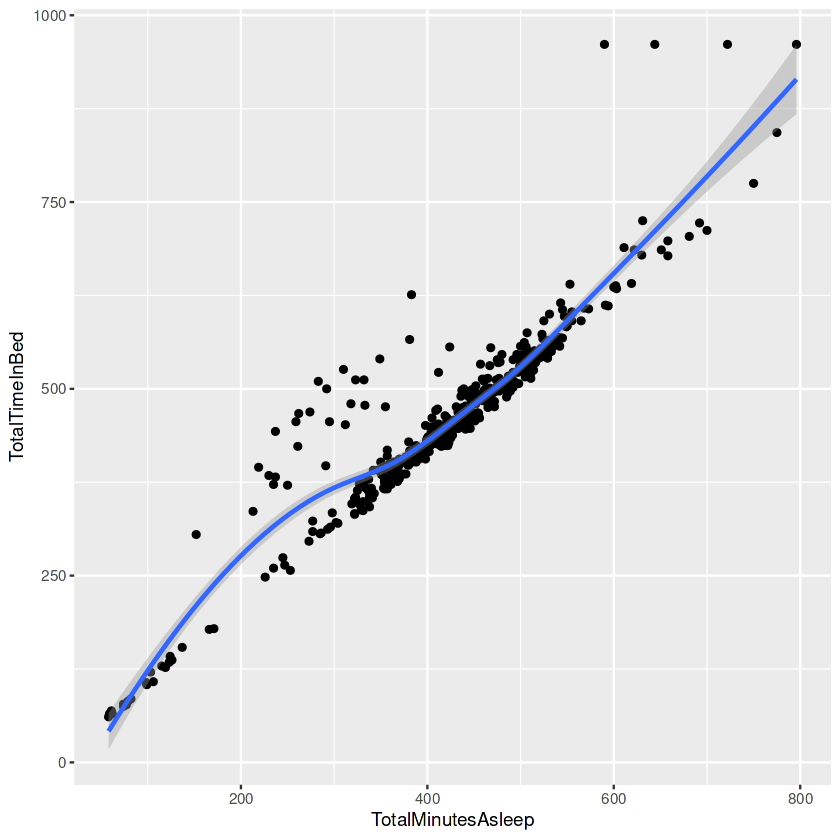

In [13]:
ggplot(data=sleepDay_merged, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point() + geom_smooth()


**    Now I'll check the data from the daily activity records and briefly summarise this information statistically, focusing on the total number of steps taken each day, the distance travelled and the minutes spent immobile.**

In [14]:
dailyActivity_merged %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

**    The female population using Bellabeat products routinely walks an average of 7,638 steps during the day. Sorting this value and observing the central average, we see that this population walks around 7,406 steps. The progression to reach this value starts at 3,790 steps. This can be observed as a stagnant daytime. In contrast, a day with intense activity of recorded steps consists of this variation of data, with an additional 3,848 steps, resulting in 10,727 steps recorded throughout the day. These findings show that the impact of physical activity on Fitbit users' routines is 3,848 more steps than on days with more idle time periods.**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


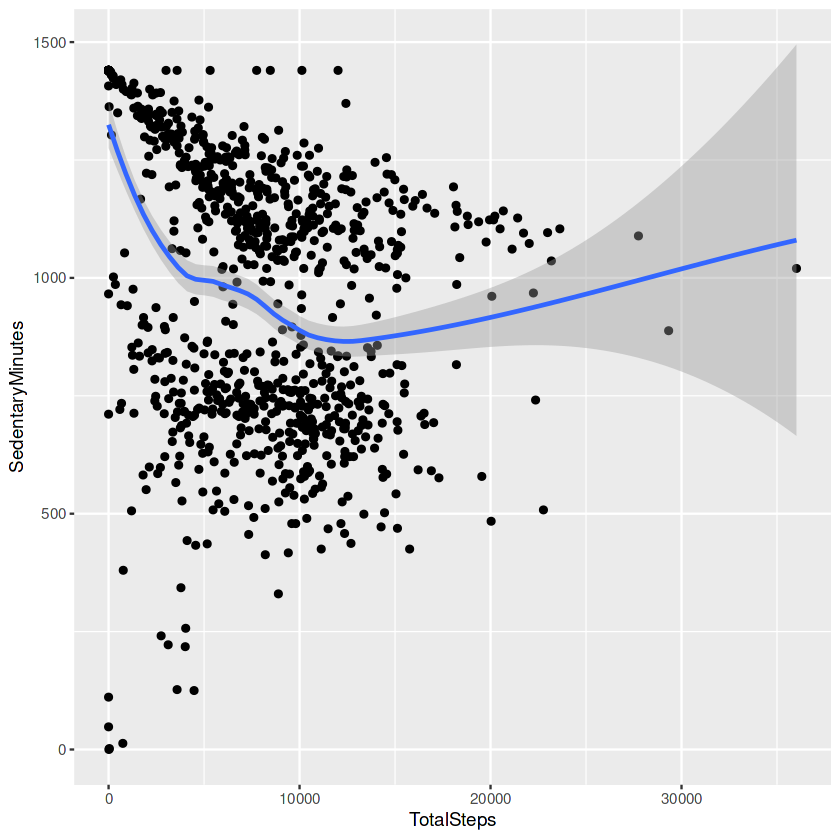

In [15]:
ggplot(data=dailyActivity_merged, aes(x=TotalSteps, y=SedentaryMinutes))  + geom_point() + geom_smooth()


> # Act Phase 

*  I propose that the marketing team use this idle time, which the people who use Bellabeat end up spending in bed, to combine with audiovisual suggestions that add healthy movement to their wellbeing.  Since the activities will target a female audience, consider incorporating dance sessions, stretching exercises to improve mobility, and yoga activities with instructions guided by audiovisual resources. Reminders and suggestions for these activities in specific contexts can positively impact clients' routines. 
* Reminding and notifying users that the daytime they go without doing any physical activity has a daily impact of 3848 steps over the week, thus preventing them from maintaining their physical stability and well-being. 

    The importance of recommending this and reminding users to activate it every day is so that they can prevent it, research shows that walking, especially brisk walking, can improve cardiorespiratory fitness, muscular strength, and body composition.2 Walking also supports optimal mental health by reducing stress and boosting overall mood.3 Here's more on these benefits.
    Walking, especially at a brisk pace, can reduce risks of cardiovascular disease, help you achieve and maintain a healthy weight, and reduces systolic and diastolic blood pressure, according to research. As your aerobic capacity improves, your body uses oxygen more efficiently, which means your heart remains strong and your arteries stay clear.
Walking each day lowers stress and anxiety levels, and the benefits extend past the time you are actively walking. Generally, being active relieves symptoms of anxiety, and combining that with time spent in nature creates a powerful effect. Research published in the International Journal of Psychophysiology reveals walking for just a quarter-mile stroll at any pace in nature provides impactful benefits for mental health, including lower stress and anxiety levels and improved psychological state when compared to indoor exercise.

**REFÊRENCIAS:**
Murtagh EM, Nichols L, Mohammed MA, Holder R, Nevill AM, Murphy MH. The effect of walking on risk factors for cardiovascular disease: An updated systematic review and meta-analysis of randomised control trials. Preventive Medicine. 2015;72:34-43. doi:10.1016/j.ypmed.2014.12.041

Mavrantza AM, Bigliassi M, Calogiuri G. Psychophysiological mechanisms underlying the effects of outdoor green and virtual green exercise during self-paced walking. International Journal of Psychophysiology. 2023;184:39-50. doi:10.1016/j.ijpsycho.2022.12.006